<a href="https://colab.research.google.com/github/aasikha/Week-3-Predict-Employee-Attrition-using-Machine-Learning/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Predicting Employee Attrition with IBM HR Analytics Dataset

### Objective
Build a machine learning model to predict whether an employee is likely to leave the company.  
We will go through **data preprocessing, EDA, feature engineering, model building, and evaluation**.

### Dataset
Kaggle link: [IBM HR Analytics Attrition Dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

### Tools & Libraries
- pandas, numpy (data handling)  
- matplotlib, seaborn (visualization)  
- scikit-learn (ML models & evaluation)  
- imbalanced-learn (SMOTE for class imbalance)  
- XGBoost (advanced classifier)  


# Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Step 2: Load Dataset

In [4]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()

Shape of dataset: (1470, 35)

Columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Step 3: Explore Data

In [5]:
print(df.info())
print(df.describe())
print(df['Attrition'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Step 4: Encode Categorical Variables

In [6]:
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Step 5: Define Features (X) and Target (y)

In [7]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Step 6: Scale Features

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Handle Class Imbalance using SMOTE

In [9]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)
print("Resampled dataset shape:", X_res.shape, y_res.shape)

Resampled dataset shape: (2466, 34) (2466,)


# Step 8: Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Step 9: Build Models

In [11]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

In [12]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [13]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:08:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



# Step 10: Evaluate Models


🔹 Logistic Regression Results 🔹
Accuracy: 0.757085020242915
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75       250
           1       0.73      0.80      0.77       244

    accuracy                           0.76       494
   macro avg       0.76      0.76      0.76       494
weighted avg       0.76      0.76      0.76       494



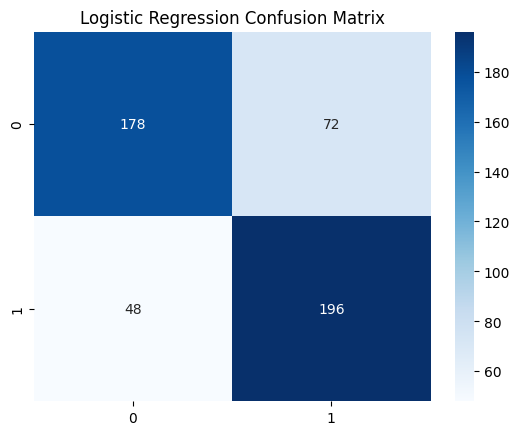


🔹 Random Forest Results 🔹
Accuracy: 0.9352226720647774
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       250
           1       0.96      0.91      0.93       244

    accuracy                           0.94       494
   macro avg       0.94      0.93      0.94       494
weighted avg       0.94      0.94      0.94       494



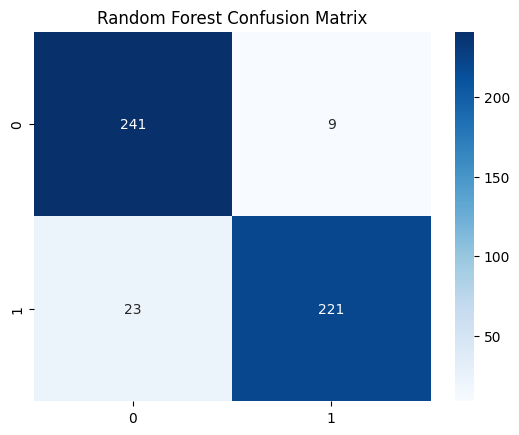


🔹 XGBoost Results 🔹
Accuracy: 0.9291497975708503
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       250
           1       0.95      0.90      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



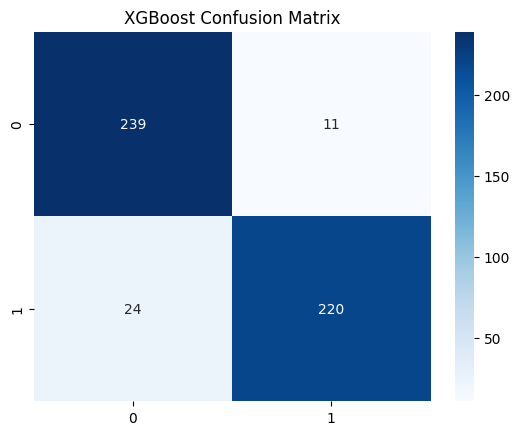

In [15]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n🔹 {model_name} Results 🔹")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")



# Step 11: Feature Importance (Random Forest)

/tmp/ipython-input-2068926126.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


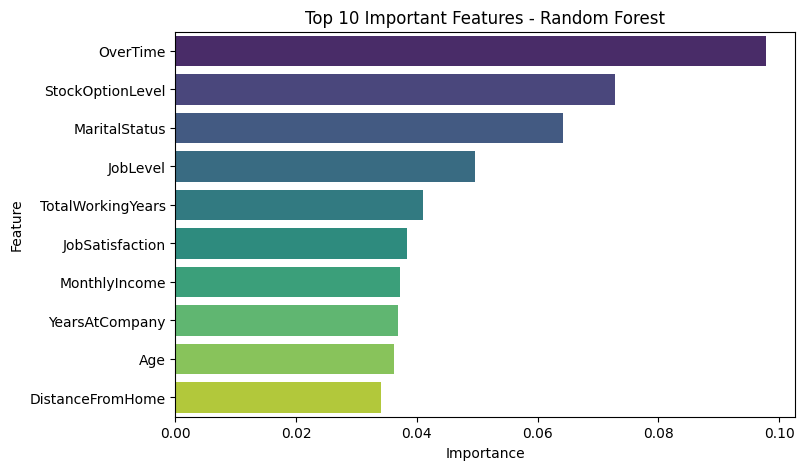

In [16]:
importances = rf.feature_importances_
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Top 10 Important Features - Random Forest")
plt.show()

# 📌 Final Thoughts
- Random Forest and XGBoost usually perform better than Logistic Regression.  
- Features like **OverTime, JobRole, Age, MonthlyIncome** strongly influence attrition.  
- HR teams can use these insights to design better employee retention strategies.  
